<a href="https://colab.research.google.com/github/ArmanAghania/Data-Analysis-Concepts-done-with-Python/blob/main/Google_Causal_Impact_Challenge_VolksWagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries and Dates

In [1]:
#Install Libraries
! pip install yfinance tfcausalimpact

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
#Import Libraries
import yfinance as yf
from causalimpact import CausalImpact
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
#Dates
training_start = "2014-01-08"
training_end = "2015-08-26"
treatment_start = "2015-09-02"
treatment_end = "2015-09-30"
end_stock = "2015-10-02"

In [39]:
#VolksWagen Stock
y = ['VOW.DE']
y = yf.download(tickers = y,
                start = training_start,
                end = end_stock,
                interval = '1wk')
y = y['Adj Close'].rename('y')
y[:2]

[*********************100%***********************]  1 of 1 completed


Date
2014-01-06    125.620453
2014-01-13    127.199554
Name: y, dtype: float64

In [40]:
#Load More Data
stocks = ['META', 'DIS', 'NVS', 'CARL-B.CO']
X = yf.download(tickers = stocks,
                start = training_start,
                end = end_stock,
                interval = '1wk')
X = X.iloc[:,:len(stocks)]
X.columns = X.columns.droplevel()
X.head()

[*********************100%***********************]  4 of 4 completed


,CARL-B.CO,DIS,META,NVS
Date,,,,
2014-01-06,469.540527,69.382637,57.939999,50.780769
2014-01-13,478.011505,68.084991,56.299999,50.680882
2014-01-20,463.893066,66.925385,54.450001,49.844318
2014-01-27,434.849304,66.824165,62.570000,49.363609
2014-02-03,440.496674,69.640335,64.320000,50.518562


In [41]:
#Combine Both Datasets
df = pd.concat([y, X], axis=1).dropna()
df.head()

,y,CARL-B.CO,DIS,META,NVS
Date,,,,,
2014-01-06,125.620453,469.540527,69.382637,57.939999,50.780769
2014-01-13,127.199554,478.011505,68.084991,56.299999,50.680882
2014-01-20,119.239487,463.893066,66.925385,54.450001,49.844318
2014-01-27,116.242401,434.849304,66.824165,62.570000,49.363609
2014-02-03,117.628159,440.496674,69.640335,64.320000,50.518562


#Correlation Matrix

In [42]:
df_training = df[df.index <= training_end]
df_training.tail()

,y,CARL-B.CO,DIS,META,NVS
Date,,,,,
2015-07-27,123.860626,492.802460,112.492081,94.010002,68.847946
2015-08-03,128.907928,501.126770,102.508400,94.300003,67.826004
2015-08-10,121.135056,485.310486,100.455437,94.419998,68.005180
2015-08-17,111.040482,428.704803,92.655968,86.059998,64.740288
2015-08-24,114.741837,420.796661,96.068253,91.010002,65.264542


<Axes: >

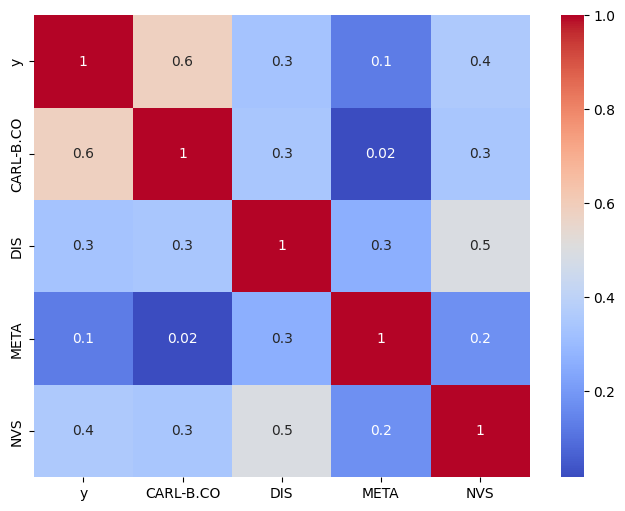

In [43]:
#Correlation Matrix
plt.figure(figsize = (8,6))
sns.heatmap(data = df_training.pct_change().dropna().corr(),
            annot = True,
            fmt = '.1g',
            cmap = 'coolwarm')

In [44]:
#Removing Unwanted Time Series
df = df.drop(columns = 'META')

#Google Causal Impact

In [47]:
#Dates
training_start = "2014-01-06"
training_end = "2015-08-31"
treatment_start = "2015-09-07"
treatment_end = "2015-09-28"
end_stock = "2015-10-02"

In [48]:
#Define Pre and Post Periods
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]

In [49]:
#Causal Impact
impact = CausalImpact(data = df,
                      pre_period = pre_period,
                      post_period = post_period)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))
Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


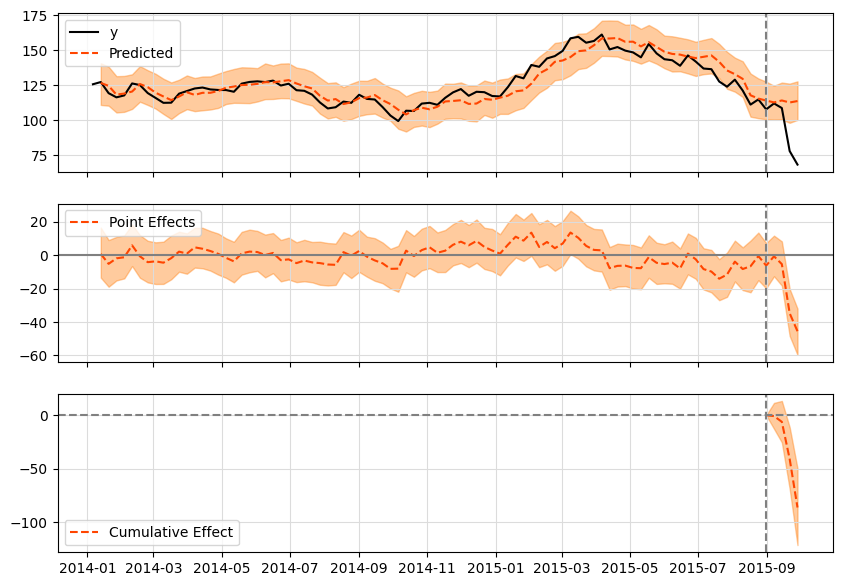

In [50]:
#Visualization
impact.plot()

In [53]:
#Summary
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    91.57              366.3
Prediction (s.d.)         113.19 (4.82)      452.77 (19.28)
95% CI                    [103.67, 122.56]   [414.68, 490.25]

Absolute effect (s.d.)    -21.62 (4.82)      -86.47 (19.28)
95% CI                    [-30.99, -12.1]    [-123.96, -48.38]

Relative effect (s.d.)    -19.1% (4.26%)     -19.1% (4.26%)
95% CI                    [-27.38%, -10.69%] [-27.38%, -10.69%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [54]:
#Report
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 91.57. By contrast, in the absence of an
intervention, we would have expected an average response of 113.19.
The 95% interval of this counterfactual prediction is [103.67, 122.56].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -21.62 with a 95% interval of
[-30.99, -12.1]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 366.3.
By contrast, had the intervention not taken place, we would have expected
a sum of 452.77. The 95% interval of this prediction is [414.68, 490.25].


The above results are given in terms of absolute numbers. In relative
terms, the response va